In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz
import pickle

# Decision Tree Classification

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
# print(data_breast_cancer['DESCR'])

In [3]:
X = data_breast_cancer['data'][['mean texture', 'mean symmetry']]
y = data_breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Train]: max depth: 1, f1_score: 0.75390625
[Test]: max depth: 1, f1_score: 0.6949152542372882

[Train]: max depth: 2, f1_score: 0.8211243611584327
[Test]: max depth: 2, f1_score: 0.7887323943661971

[Train]: max depth: 3, f1_score: 0.8211243611584327
[Test]: max depth: 3, f1_score: 0.7887323943661971

[Train]: max depth: 4, f1_score: 0.8464163822525598
[Test]: max depth: 4, f1_score: 0.7647058823529411

[Train]: max depth: 5, f1_score: 0.8710217755443886
[Test]: max depth: 5, f1_score: 0.7397260273972602

[Train]: max depth: 6, f1_score: 0.896551724137931
[Test]: max depth: 6, f1_score: 0.7132867132867133

[Train]: max depth: 7, f1_score: 0.9215017064846417
[Test]: max depth: 7, f1_score: 0.7172413793103448

[Train]: max depth: 8, f1_score: 0.9395509499136442
[Test]: max depth: 8, f1_score: 0.7246376811594203

[Train]: max depth: 9, f1_score: 0.9598603839441536
[Test]: max depth: 9, f1_score: 0.6962962962962963

[Train]: max depth: 10, f1_score: 0.9841269841269841
[Test]: max depth: 1

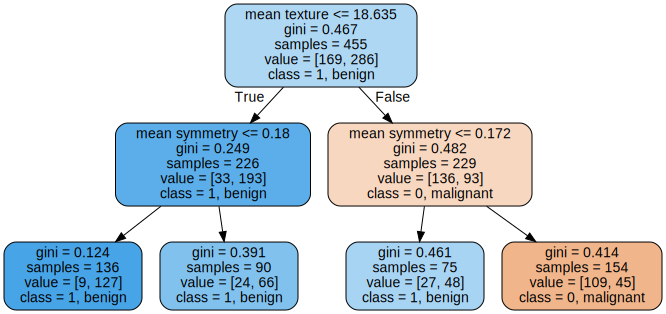

In [4]:
f1_scores_train = []
f1_scores_test = []

for i in range(1, 11):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train, y_train)

    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)
    print(f'[Train]: max depth: {i}, f1_score: {f1_train}')
    print(f'[Test]: max depth: {i}, f1_score: {f1_test}\n')

best_score = max(f1_scores_test)
best_depth = f1_scores_test.index(best_score) + 1
print(f'Najlepsza głębokość: {best_depth}, F1: {best_score}')

tree_clf = DecisionTreeClassifier(max_depth=best_depth)
tree_clf.fit(X_train, y_train)

str_dot = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=X.columns,
        class_names=[str(num) + ", " + name for num,name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)],
        rounded=True,
        filled=True
)
    
graph = graphviz.Source(str_dot)
graph.render('bc', format='png')
graph

In [5]:
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

clf_results = [best_depth, f1_train, f1_test, acc_train, acc_test]

with open("f1acc_tree.pkl", "wb") as f:
    pickle.dump(clf_results, f)

with open("f1acc_tree.pkl", "rb") as f:
    print(pickle.load(f))

[2, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


# Decision Tree Regression

<Axes: xlabel='x', ylabel='y'>

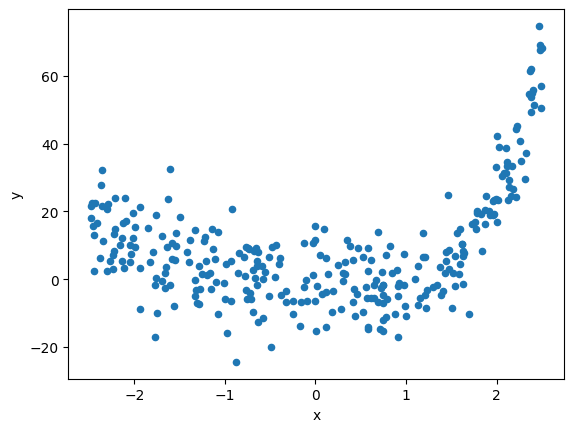

In [6]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [7]:
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Train]: max depth: 1, mse_score: 128.91810462291465
[Test]: max depth: 1, mse_score: 98.78944579853457

[Train]: max depth: 2, mse_score: 87.00729796209059
[Test]: max depth: 2, mse_score: 77.48560288286664

[Train]: max depth: 3, mse_score: 69.56750371178653
[Test]: max depth: 3, mse_score: 63.48064374738747

[Train]: max depth: 4, mse_score: 61.79751326006681
[Test]: max depth: 4, mse_score: 65.47808741576743

[Train]: max depth: 5, mse_score: 54.956841958571886
[Test]: max depth: 5, mse_score: 71.20914259785044

[Train]: max depth: 6, mse_score: 49.284335271904865
[Test]: max depth: 6, mse_score: 74.6904556897046

[Train]: max depth: 7, mse_score: 46.176211396000596
[Test]: max depth: 7, mse_score: 78.91342192193079

[Train]: max depth: 8, mse_score: 37.87532916151037
[Test]: max depth: 8, mse_score: 77.04323055929882

[Train]: max depth: 9, mse_score: 30.367305782580388
[Test]: max depth: 9, mse_score: 81.7572926827379

[Train]: max depth: 10, mse_score: 25.458785279151936
[Test]:

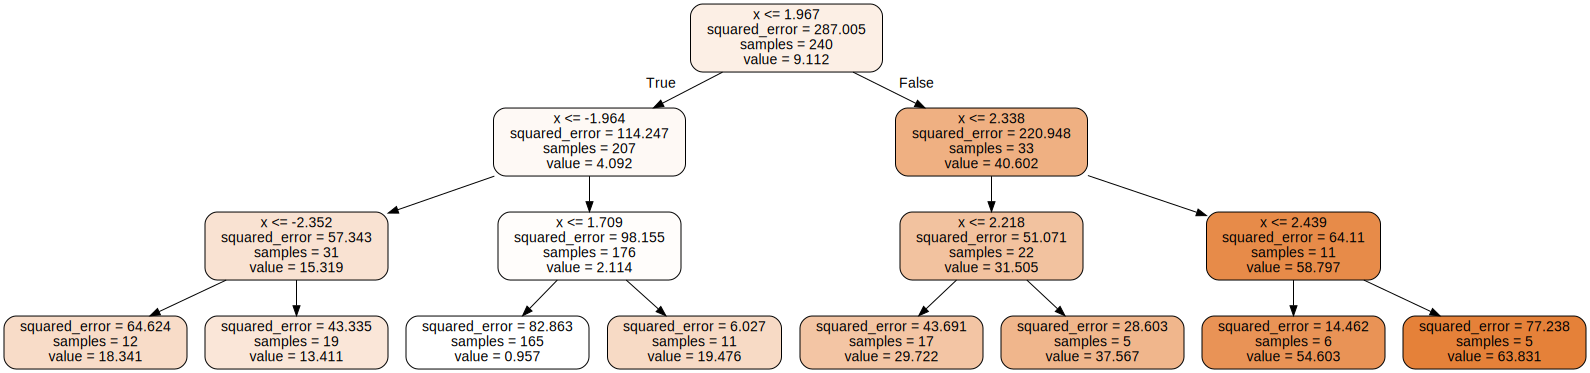

In [8]:
mse_scores_train = []
mse_scores_test = []

for i in range(1, 11):
    tree_reg = DecisionTreeRegressor(max_depth=i)
    tree_reg.fit(X_train, y_train)

    y_pred_train = tree_reg.predict(X_train)
    y_pred_test = tree_reg.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_scores_train.append(mse_train)
    mse_scores_test.append(mse_test)
    print(f'[Train]: max depth: {i}, mse_score: {mse_train}')
    print(f'[Test]: max depth: {i}, mse_score: {mse_test}\n')

best_score = min(mse_scores_test)
best_depth = mse_scores_test.index(best_score) + 1
print(f'Najlepsza głębokość: {best_depth}, MSE: {best_score}')

tree_reg = DecisionTreeRegressor(max_depth=best_depth)
tree_reg.fit(X_train, y_train)

str_dot = export_graphviz(
        tree_reg,
        out_file=None,
        feature_names=['x'],
        rounded=True,
        filled=True
)
    
graph = graphviz.Source(str_dot)
graph.render('reg', format='png')
graph

[3, 69.56750371178653, 63.48064374738747]


/home/piotrp/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


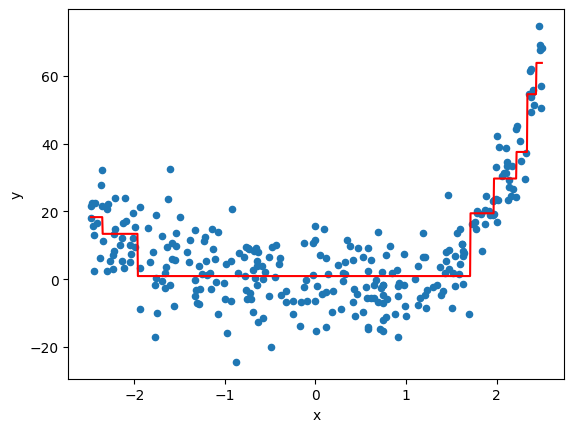

In [9]:
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

reg_results = [best_depth, mse_train, mse_test]

with open("mse_tree.pkl", "wb") as f:
    pickle.dump(reg_results, f)

with open("mse_tree.pkl", "rb") as f:
    print(pickle.load(f))

df.plot.scatter(x='x',y='y')
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = tree_reg.predict(X_range)
plt.plot(X_range, y_pred, c='red')